# Proyek analisis Data: Bike Sharing Dataset
- **Nama:** Nandisya Faiz Effendi
- **Email:** faizeffendi2004@gmail.com
- **ID Dicoding:** faiz-effendi

# Menentukan Pertanyaan Bisnis

- Bagaimana tren penyewaan sepeda keseluruhan bervariasi antara musim?
- Pengaruh apa yang diberikan oleh suhu dan kelembapan lingkungan pada jumlah peminjaman sepeda?
- Bagaimana kondisi cuaca berpengaruh pada jumlah peminjaman?

# Import Semua Packages/Library yang Digunakan

In [1]:
# data process
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# dashboard
import streamlit as st

# Data Wrangling

## Gathering Data

In [2]:
day_df = pd.read_csv('./day.csv')
hour_df = pd.read_csv('./hour.csv') # tidak digunakan 

In [3]:
day_df.sample(5)

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
111      112  2011-04-22       2   0     4        0        5           1   
357      358  2011-12-24       1   0    12        0        6           0   
592      593  2012-08-15       3   1     8        0        3           1   
214      215  2011-08-03       3   0     8        0        3           1   
633      634  2012-09-25       4   1     9        0        2           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
111           2  0.336667  0.321954  0.729583   0.219521     177        1506   
357           1  0.302500  0.299242  0.542500   0.190304     155         856   
592           1  0.706667  0.654037  0.619583   0.169771    1198        6149   
214           2  0.731667  0.679937  0.657500   0.135583     467        3107   
633           1  0.550000  0.544179  0.570000   0.236321     845        6693   

      cnt  
111  1683  
357  1011  
592  7347  
214  3574  
633  7538

In [4]:
hour_df.sample(5)

instant      dteday  season  yr  mnth  hr  holiday  weekday  \
17349    17350  2012-12-30       1   1    12  18        0        0   
11801    11802  2012-05-11       2   1     5  22        0        5   
4402      4403  2011-07-07       3   0     7   8        0        4   
14697    14698  2012-09-09       3   1     9  14        0        0   
3799      3800  2011-06-12       2   0     6   5        0        0   

       workingday  weathersit  temp   atemp   hum  windspeed  casual  \
17349           0           2  0.24  0.2121  0.44     0.2985      12   
11801           1           1  0.56  0.5303  0.35     0.2239      44   
4402            1           2  0.70  0.6667  0.79     0.1940      28   
14697           0           1  0.72  0.6515  0.30     0.2836     232   
3799            0           1  0.62  0.5606  0.88     0.2239       5   

       registered  cnt  
17349         113  125  
11801         190  234  
4402          415  443  
14697         415  647  
3799            5   10

**Insight:**
- perbedaan hanya pada hour.csv memiliki column/feature hr yang mewakilkan hours (0 - 23)

## Assessing Data

### mencari missing value dalam dataframe

In [5]:
day_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### menghitung banyak duplikasi dalam dataframe

In [6]:
print(f'Duplikasi data: {day_df.duplicated().sum()}')

Duplikasi data: 0


### mencari apakah ada data yang invalid atau tidak sesuai ketentuan

In [7]:
day_df.describe()

instant      season          yr        mnth     holiday     weekday  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean   366.000000    2.496580    0.500684    6.519836    0.028728    2.997264   
std    211.165812    1.110807    0.500342    3.451913    0.167155    2.004787   
min      1.000000    1.000000    0.000000    1.000000    0.000000    0.000000   
25%    183.500000    2.000000    0.000000    4.000000    0.000000    1.000000   
50%    366.000000    3.000000    1.000000    7.000000    0.000000    3.000000   
75%    548.500000    3.000000    1.000000   10.000000    0.000000    5.000000   
max    731.000000    4.000000    1.000000   12.000000    1.000000    6.000000   

       workingday  weathersit        temp       atemp         hum   windspeed  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     0.683995    1.395349    0.495385    0.474354    0.627894    0.190486   
std      0.465233    0.544894    0.183051    0.162961    0.142429    0.077498   
min      0.000000    1.000000    0.059130    0.079070    0.000000    0.022392   
25%      0.000000    1.000000    0.337083    0.337842    0.520000    0.134950   
50%      1.000000    1.000000    0.498333    0.486733    0.626667    0.180975   
75%      1.000000    2.000000    0.655417    0.608602    0.730209    0.233214   
max      1.000000    3.000000    0.861667    0.840896    0.972500    0.507463   

            casual   registered          cnt  
count   731.000000   731.000000   731.000000  
mean    848.176471  3656.172367  4504.348837  
std     686.622488  1560.256377  1937.211452  
min       2.000000    20.000000    22.000000  
25%     315.500000  2497.000000  3152.000000  
50%     713.000000  3662.000000  4548.000000  
75%    1096.000000  4776.500000  5956.000000  
max    3410.000000  6946.000000  8714.000000

### Identifikasi Outliers kolom casual

In [8]:
q25, q75 = np.percentile(day_df['casual'], 25), np.percentile(day_df['casual'], 75)
iqr = q75-q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers_casual_users = [x for x in day_df['casual'] if x < minimum or x > maximum]

In [9]:
if outliers_casual_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_casual_users)}')
else:
    print('Tidak terdapat outliers')

Banyak outlier pengguna casual: 44


### Identifikasi Outliers kolom registered

In [10]:
q25, q75 = np.percentile(day_df['registered'], 25), np.percentile(day_df['registered'], 75)
iqr = q75-q25
cut_off = iqr * 1.5
minimum, maximum = q25 - cut_off, q75 + cut_off

outliers_registered_users = [x for x in day_df['registered'] if x < minimum or x > maximum]

In [11]:
if outliers_registered_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_registered_users)}')
else:
    print('Tidak terdapat outliers')

Tidak terdapat outliers


**Insight:**
- assessing data berdasarkan missing value dan duplicated data menunjukan tidak adanya keanehan dalam data
- berdasarkan descriptive statistics tidak ditemukan adanya data yang invalid
- column/feature casual terdapat 44 data outlier

## Cleaning Data

### mengatasi outlier dengan batas min atau max

In [12]:
day_df['casual'] = day_df['casual'].apply(lambda x: minimum if x < minimum else (maximum if x > maximum else x))

In [13]:
outliers_casual_users = [x for x in day_df['casual'] if x < minimum or x > maximum]

if outliers_casual_users:
    print(f'Banyak outlier pengguna casual: {len(outliers_casual_users)}')
else:
    print('Tidak terdapat outliers\n')

day_df.info()

Tidak terdapat outliers

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


### mengganti nama column agar lebih merepresentasikan isinya

In [14]:
day_df.rename(columns={
    'dteday': 'date',
    'yr': 'year',
    'mnth': 'month',
    'cnt': 'total_book',
}, inplace=True)

In [15]:
day_df['date'] = pd.to_datetime(day_df['date'])

In [16]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   date        731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   year        731 non-null    int64         
 4   month       731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  total_book  731 non-null    int64         
dtypes: datetime64[ns](1), floa

### mengubah kolom season ke bentuk categorical agar lebih mudah untuk exploratory

In [17]:
day_df['season'] = day_df['season'].apply(lambda season: 'spring' if season == 1 else ('summer' if season == 2 else ('fall' if season == 3 else 'winter')))

In [18]:
day_df.sample(5)

instant       date  season  year  month  holiday  weekday  workingday  \
509      510 2012-05-24  summer     1      5        0        4           1   
386      387 2012-01-22  spring     1      1        0        0           0   
526      527 2012-06-10  summer     1      6        0        0           0   
588      589 2012-08-11    fall     1      8        0        6           0   
376      377 2012-01-12  spring     1      1        0        4           1   

     weathersit      temp     atemp       hum  windspeed  casual  registered  \
509           1  0.655000  0.606700  0.716667   0.172896    1059        5711   
386           2  0.162500  0.162250  0.796250   0.199638     196        1781   
526           1  0.726667  0.663517  0.538333   0.133721    2224        4374   
588           2  0.692500  0.638267  0.732917   0.206479    2247        4052   
376           2  0.382500  0.381938  0.802917   0.180967     269        3828   

     total_book  
509        6770  
386        1977  
526        6598  
588        6299  
376        4097

In [19]:
day_df.describe()

instant                 date        year       month     holiday  \
count  731.000000                  731  731.000000  731.000000  731.000000   
mean   366.000000  2012-01-01 00:00:00    0.500684    6.519836    0.028728   
min      1.000000  2011-01-01 00:00:00    0.000000    1.000000    0.000000   
25%    183.500000  2011-07-02 12:00:00    0.000000    4.000000    0.000000   
50%    366.000000  2012-01-01 00:00:00    1.000000    7.000000    0.000000   
75%    548.500000  2012-07-01 12:00:00    1.000000   10.000000    0.000000   
max    731.000000  2012-12-31 00:00:00    1.000000   12.000000    1.000000   
std    211.165812                  NaN    0.500342    3.451913    0.167155   

          weekday  workingday  weathersit        temp       atemp         hum  \
count  731.000000  731.000000  731.000000  731.000000  731.000000  731.000000   
mean     2.997264    0.683995    1.395349    0.495385    0.474354    0.627894   
min      0.000000    0.000000    1.000000    0.059130    0.079070    0.000000   
25%      1.000000    0.000000    1.000000    0.337083    0.337842    0.520000   
50%      3.000000    1.000000    1.000000    0.498333    0.486733    0.626667   
75%      5.000000    1.000000    2.000000    0.655417    0.608602    0.730209   
max      6.000000    1.000000    3.000000    0.861667    0.840896    0.972500   
std      2.004787    0.465233    0.544894    0.183051    0.162961    0.142429   

        windspeed       casual   registered   total_book  
count  731.000000   731.000000   731.000000   731.000000  
mean     0.190486   848.176471  3656.172367  4504.348837  
min      0.022392     2.000000    20.000000    22.000000  
25%      0.134950   315.500000  2497.000000  3152.000000  
50%      0.180975   713.000000  3662.000000  4548.000000  
75%      0.233214  1096.000000  4776.500000  5956.000000  
max      0.507463  3410.000000  6946.000000  8714.000000  
std      0.077498   686.622488  1560.256377  1937.211452

# Exploratory Data Analysis (EDA)

## Explore

### mencari korelasi antar kolom

In [20]:
temp_to_total_df = day_df[['temp', 'total_book']]
temp_to_total_df.head()

temp  total_book
0  0.344167         985
1  0.363478         801
2  0.196364        1349
3  0.200000        1562
4  0.226957        1600

### temuan menarik
kolom temp memiliki correlation positif sedang dengan kolom total_book yang berarti jika salah satu variabel naik variabel lainnya cenderung naik

In [21]:
temp_to_total_df.corr()

temp  total_book
temp        1.000000    0.627494
total_book  0.627494    1.000000

In [22]:
hum_to_casual_df = day_df[['hum', 'total_book']]
hum_to_casual_df.head()

hum  total_book
0  0.805833         985
1  0.696087         801
2  0.437273        1349
3  0.590435        1562
4  0.436957        1600

In [23]:
hum_to_casual_df.corr()

hum  total_book
hum         1.000000   -0.100659
total_book -0.100659    1.000000

In [24]:
temp_to_registered_df = day_df[['temp', 'registered']]
temp_to_registered_df.head()

temp  registered
0  0.344167         654
1  0.363478         670
2  0.196364        1229
3  0.200000        1454
4  0.226957        1518

In [25]:
temp_to_registered_df.corr()

temp  registered
temp        1.000000    0.540012
registered  0.540012    1.000000

In [26]:
weather_to_total_df = day_df[['weathersit', 'total_book']]
weather_to_total_df.sample(10)

weathersit  total_book
252           1        5345
555           2        6569
322           1        3663
602           2        6053
249           3        1996
359           1        1317
107           1        3429
292           1        4195
710           2        5501
423           1        4363

In [27]:
weather_to_total_df.corr()

weathersit  total_book
weathersit    1.000000   -0.297391
total_book   -0.297391    1.000000

In [28]:
season_to_total_df = day_df.groupby(by='season').agg({
    'instant': 'nunique',
    'casual': 'sum',
    'registered': 'sum',
    'total_book': 'sum',
}).sort_values(by='total_book', ascending=False).reset_index()

season_to_total_df

season  instant  casual  registered  total_book
0    fall      188  226091      835038     1061129
1  summer      184  203522      715067      918589
2  winter      178  129782      711831      841613
3  spring      181   60622      410726      471348

**Insight:**
- kolom temp memiliki correlation positif sedang dengan kolom total_book sebesar 0.627 ini berarti jika satu variabel naik, varianel lainnya akan cenderung naik tetapi cenderung tidak sekuat correlation 1
- kolom hum memiliki correlation negatif lemah dengan total book namun hubungannya tidak terlalu kuat karena mendekati 0
- pemesanan terbanyak terjadi saat musim gugur/fall 

# Visualization & Explanatory Analysis

## Bagaimana tren penyewaan sepeda keseluruhan bervariasi antara musim?

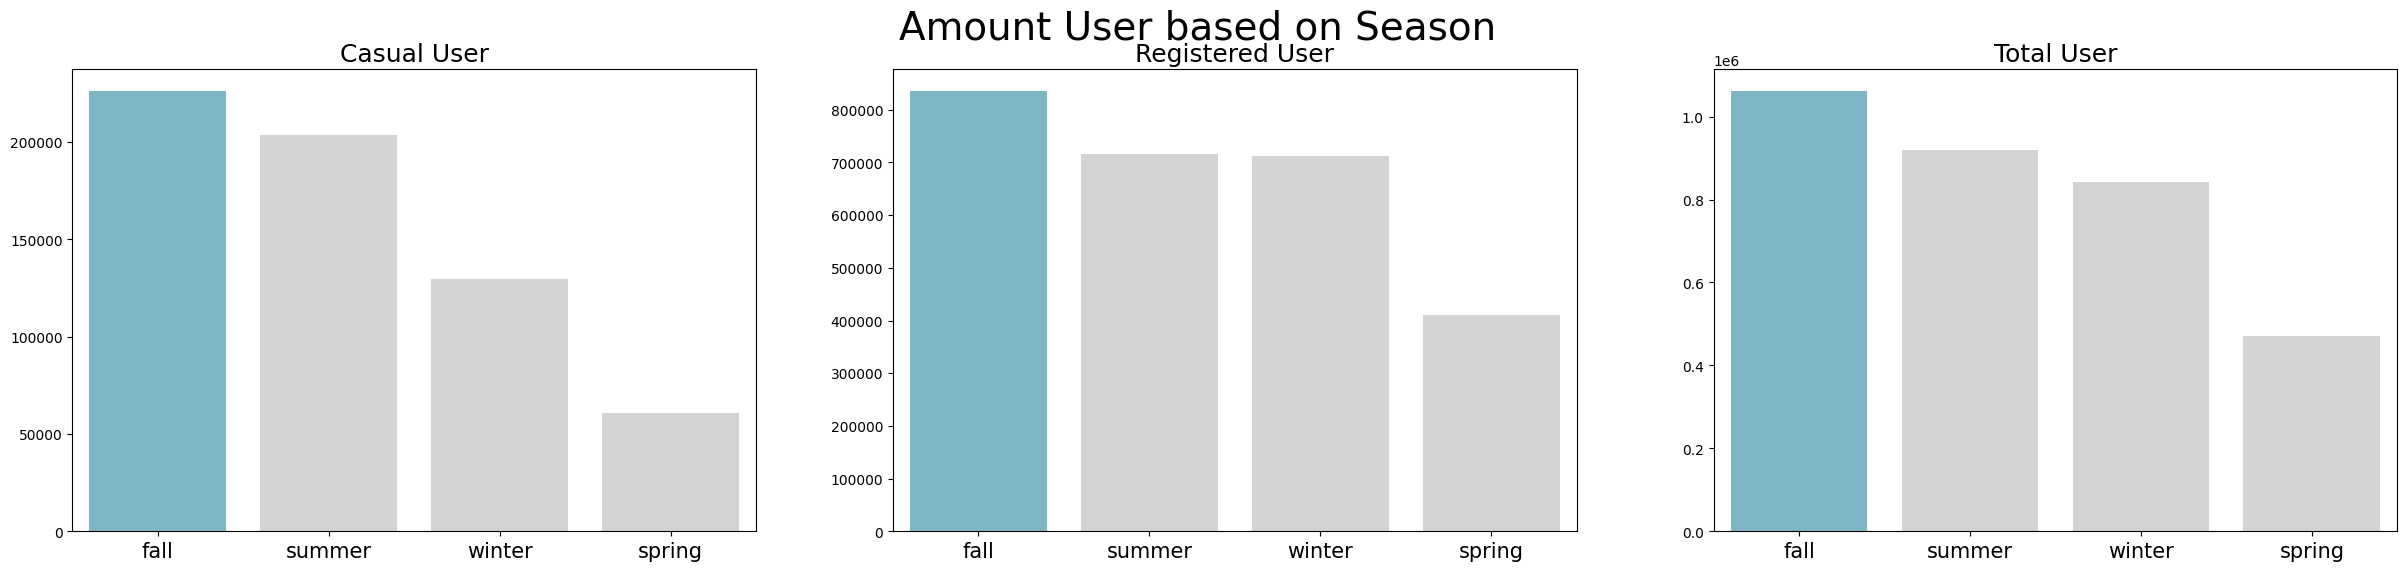

In [29]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 6))
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(y='casual', x='season', data=season_to_total_df.sort_values(by='casual', ascending=False), hue='season', palette=colors, legend=False, ax=ax[0])
ax[0].set_ylabel(None)
ax[0].set_xlabel(None)
ax[0].set_title("Casual User", loc="center", fontsize=18)
ax[0].tick_params(axis ='x', labelsize=15)
 
sns.barplot(y="registered", x="season", data=season_to_total_df.sort_values(by="registered", ascending=False), hue='season', palette=colors, legend=False, ax=ax[1])
ax[1].set_ylabel(None)
ax[1].set_xlabel(None)
ax[1].set_title("Registered User", loc="center", fontsize=18)
ax[1].tick_params(axis='x', labelsize=15)
 
sns.barplot(y="total_book", x="season", data=season_to_total_df.sort_values(by="total_book", ascending=False), hue='season', palette=colors, legend=False, ax=ax[2])
ax[2].set_ylabel(None)
ax[2].set_xlabel(None)
ax[2].set_title("Total User", loc="center", fontsize=18)
ax[2].tick_params(axis='x', labelsize=15)
 
plt.suptitle("Amount User based on Season", fontsize=28)
plt.show()

## Bagaimana kondisi cuaca berpengaruh pada jumlah peminjaman?
Kondisi cuaca memiliki correlation negatif lemah terhadap total book dengan value -0.297

**Insight:**
- Musim gugur atau fall memiliki user paling banyak baik dari pengguna casual dan registered
- kondisi cuaca memiliki correlation negatif lemah sehingga antar variabel tidak begitu berpengaruh

# Analisis Lanjutan (Manual Clustering)

## Pengaruh apa yang diberikan oleh suhu dan kelembapan lingkungan pada jumlah peminjaman sepeda?
***kelembapan memiliki relasi yang cukup lemah mendekati 0 sehingga dapat dipastikan hampir tidak berpengaruh terhadap total peminjaman***

***manual grouping temp berdasarkan suhu yang ideal untuk melakukan aktivitas outdoor dengan ketentuan sebagai berikut:***
- 'cold' suhu dingin dengan rentang suhu < 18°C diubah ke satuan yang disepakati menjadi 0.439
- 'ideal' suhu direkomendasikan dengan rentang suhu 18-28°C
- 'hot' suhu panas dengan rentang suhu > 28°C diubah ke satuan yang disepakati menjadi 0.682

In [30]:
temp_to_total_df['temp'] = temp_to_total_df.temp.apply(lambda temp: 'cold' if temp < 0.439 else ('hot' if temp > 0.682 else 'ideal') )

C:\Users\ASUS\AppData\Local\Temp\ipykernel_23732\1764003623.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_to_total_df['temp'] = temp_to_total_df.temp.apply(lambda temp: 'cold' if temp < 0.439 else ('hot' if temp > 0.682 else 'ideal') )


In [31]:
temp_to_total_df = temp_to_total_df.groupby(by='temp').total_book.sum().sort_values(ascending=False).reset_index()
temp_to_total_df

temp  total_book
0  ideal     1479698
1   cold      959182
2    hot      853799

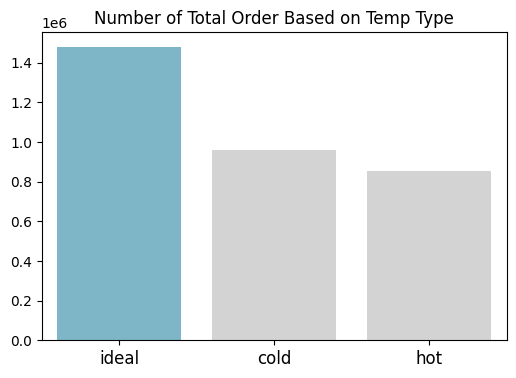

In [33]:
colors = ["#72BCD4", "#D3D3D3", "#D3D3D3"]
plt.figure(figsize=(6, 4))
sns.barplot(
    x='temp',
    y='total_book',
    data=temp_to_total_df.sort_values(by='total_book', ascending=False),
    hue='temp',
    palette = colors,
    legend=False
)

plt.title('Number of Total Order Based on Temp Type', loc='center', fontsize=12)
plt.xlabel(None)
plt.ylabel(None)
plt.tick_params(axis='x', labelsize=12)
plt.show()

# Conclusion

- Dapat dilihat musim gugur atau fall season memiliki pengguna paling banyak sebesar 1.061.129 peminjaman baik pengguna casual maupun registered. Kemudian musim panas sebesar 918.589, musim 841.613, dan musim semi 471.348 .
- Suhu ideal yang direkomendasikan untuk melakukan kegiatan outdoor 18-28°C, terbukti memiliki peminjaman terbanyak.
- Kondisi cuaca memiliki korelasi negatif lemah terhadap banyak peminjaman yaitu sebesar -0.297 angka ini terbilang tidak cukup berdampak signifikan sehingga dapat diabaikan